In [185]:
import pickle
import pandas as pd
import numpy as np

with open('input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)
print(label_type, type(label_type))

train_data = pd.read_csv('input/data/train/train.tsv', delimiter='\t', header=None)
#columns 재지정
columns = [ 'from', 'sentence', 'entitiy1', 'entity1_start', 'entity1_end',
           'entitiy2', 'entity2_start', 'entity2_end', 'class']
train_data.columns = columns

train_data_cpy = train_data.copy()

#print(len(train_data))
#train_data.head()

{'관계_없음': 0, '인물:배우자': 1, '인물:직업/직함': 2, '단체:모회사': 3, '인물:소속단체': 4, '인물:동료': 5, '단체:별칭': 6, '인물:출신성분/국적': 7, '인물:부모님': 8, '단체:본사_국가': 9, '단체:구성원': 10, '인물:기타_친족': 11, '단체:창립자': 12, '단체:주주': 13, '인물:사망_일시': 14, '단체:상위_단체': 15, '단체:본사_주(도)': 16, '단체:제작': 17, '인물:사망_원인': 18, '인물:출생_도시': 19, '단체:본사_도시': 20, '인물:자녀': 21, '인물:제작': 22, '단체:하위_단체': 23, '인물:별칭': 24, '인물:형제/자매/남매': 25, '인물:출생_국가': 26, '인물:출생_일시': 27, '단체:구성원_수': 28, '단체:자회사': 29, '인물:거주_주(도)': 30, '단체:해산일': 31, '인물:거주_도시': 32, '단체:창립일': 33, '인물:종교': 34, '인물:거주_국가': 35, '인물:용의자': 36, '인물:사망_도시': 37, '단체:정치/종교성향': 38, '인물:학교': 39, '인물:사망_국가': 40, '인물:나이': 41} <class 'dict'>


0 : 4432.0	1 : 92.0	2 : 553.0	
3 : 44.0	4 : 683.0	5 : 186.0	
6 : 231.0	7 : 209.0	8 : 164.0	
9 : 115.0	10 : 815.0	11 : 58.0	
12 : 45.0	13 : 11.0	14 : 45.0	
15 : 335.0	16 : 23.0	17 : 171.0	
18 : 7.0	19 : 4.0	20 : 135.0	
21 : 84.0	22 : 56.0	23 : 79.0	
24 : 103.0	25 : 52.0	26 : 8.0	
27 : 36.0	28 : 9.0	29 : 6.0	
30 : 12.0	31 : 15.0	32 : 26.0	
33 : 67.0	34 : 15.0	35 : 27.0	
36 : 11.0	37 : 3.0	38 : 18.0	
39 : 9.0	40 : 1.0	41 : 5.0	


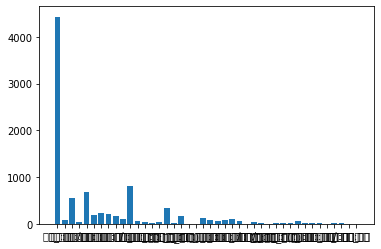

In [173]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#각 라벨별 갯수 파악
label_cnt = np.zeros(len(label_type))

for _, row in train_data.iterrows() :
    for key, value in label_type.items() :
        if key == row["class"] : 
            label_cnt[value] += 1
            break

for i, cnt in enumerate(label_cnt) :
    print(i, ':', cnt, end = '\t')
    if (i+1)%3 == 0 : print()

plt.bar(np.arange(len(label_cnt)), label_cnt)
plt.xticks(np.arange(len(label_cnt)), label_type.keys())
plt.show()

In [174]:
from eda import *
from tqdm.notebook import tqdm

for _, row in tqdm(train_data_cpy.iterrows()) :
    start_word = row["entitiy1"]
    end_word = row["entitiy2"]
    sentence = (row["sentence"] + 'a')[:-1] #copy
    
    for key, value in label_type.items() :
        if key == row["class"] : 
            if(label_cnt[value] != max(label_cnt)) :
                #랜덤 단어 삭제
                cnt = 1
                cnt_tmp = 0
                
                while cnt < 15 :
                    if cnt_tmp == 30 :
                        cnt_tmp = 0
                        break
                        
                    sentence_tmp = random_deletion(sentence, cnt)
                    sentence_tmp = ' '.join(sentence_tmp)
                    
                    if sentence_tmp in list(train_data["sentence"]):
                        cnt_tmp += 1
                        continue
                    
                    
                    if start_word in sentence_tmp and end_word in sentence_tmp :
                        start_index = sentence_tmp.find(start_word)
                        start_index_end = start_index + len(start_word) - 1
                        
                        end_index = sentence_tmp.find(end_word)
                        end_index_end = end_index + len(end_word) - 1
                    
                        train_tmp = pd.DataFrame([['aug', sentence_tmp, start_word, start_index, start_index_end, end_word, end_index, end_index_end, row["class"]]], columns=columns)
                        train_data = pd.concat([train_data, train_tmp])
                        cnt+=1
                        cnt_tmp = 0
                    cnt_tmp += 1
                
                if label_cnt[value] > 100 :
                    break
                    
                #비슷한 단어로 대체 :100개 미만만
                cnt = 1
                cnt_tmp = 0
                sentence = sentence.split(' ')
                while cnt <= 25 :
                    if cnt_tmp == 50 :
                        cnt_tmp = 0
                        break
                        
                    sentence_tmp = synonym_replacement(sentence, cnt)
                    sentence_tmp = ' '.join(sentence_tmp)
                    
                    if sentence_tmp in list(train_data["sentence"]):
                        cnt_tmp += 1
                        continue
                    
                    
                    if start_word in sentence_tmp and end_word in sentence_tmp :
                        start_index = sentence_tmp.find(start_word)
                        start_index_end = start_index + len(start_word) - 1
                        
                        end_index = sentence_tmp.find(end_word)
                        end_index_end = end_index + len(end_word) - 1
                        
                        train_tmp = pd.DataFrame([['aug', sentence_tmp, start_word, start_index, start_index_end, end_word, end_index, end_index_end, row["class"]]], columns=columns)
                        train_data = pd.concat([train_data, train_tmp])
                        #train_data = train_data.append([['aug', sentence_tmp, start_word, start_index, start_index_end, end_word, end_index, end_index_end, row["class"]]], columns = columns)
                        cnt+=1
                        cnt_tmp = 0
                    cnt_tmp += 1
                    
                if label_cnt[value] > 50 :
                    break
                    
                #랜덤 단어 스왑 : 50개 미만만
                cnt = 1
                cnt_tmp = 0
                
                while cnt < 30 :
                    if cnt_tmp == 50 :
                        cnt_tmp = 0
                        break
                        
                    sentence_tmp = random_swap(sentence, cnt)
                    sentence_tmp = ' '.join(sentence_tmp)
                    
                    if sentence_tmp in list(train_data["sentence"]):
                        cnt_tmp += 1
                        continue
                    
                    
                    if start_word in sentence_tmp and end_word in sentence_tmp :
                        start_index = sentence_tmp.find(start_word)
                        start_index_end = start_index + len(start_word) - 1
                        
                        end_index = sentence_tmp.find(end_word)
                        end_index_end = end_index + len(end_word) - 1
                    
                        train_tmp = pd.DataFrame([['aug', sentence_tmp, start_word, start_index, start_index_end, end_word, end_index, end_index_end, row["class"]]], columns=columns)
                        train_data = pd.concat([train_data, train_tmp])
                        cnt+=1
                        cnt_tmp = 0
                    cnt_tmp += 1
                        
                if label_cnt[value] > 10 :
                    break
                #랜덤 단어 추가 : 10개 미만만
                cnt = 1
                cnt_tmp = 0
                
                while cnt < 50 :
                    if cnt_tmp == 50 :
                        cnt_tmp = 0
                        break
                        
                    sentence_tmp = random_insertion(sentence, cnt)
                    sentence_tmp = ' '.join(sentence_tmp)
                    
                    if sentence_tmp in list(train_data["sentence"]):
                        cnt_tmp += 1
                        continue
                    
                    if start_word in sentence_tmp and end_word in sentence_tmp :
                        start_index = sentence_tmp.find(start_word)
                        start_index_end = start_index + len(start_word) - 1
                        
                        end_index = sentence_tmp.find(end_word)
                        end_index_end = end_index + len(end_word) - 1
                    
                        train_tmp = pd.DataFrame([['aug', sentence_tmp, start_word, start_index, start_index_end, end_word, end_index, end_index_end, row["class"]]], columns=columns)
                        train_data = pd.concat([train_data, train_tmp])
                        cnt+=1
                        cnt_tmp = 0
                    cnt_tmp += 1
                
            break
            
train_data.head()

,from,sentence,entitiy1,entity1_start,entity1_end,entitiy2,entity2_start,entity2_end,class
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


24137
0 : 4432.0	1 : 519.0	2 : 553.0	
3 : 1463.0	4 : 683.0	5 : 186.0	
6 : 231.0	7 : 209.0	8 : 164.0	
9 : 115.0	10 : 815.0	11 : 220.0	
12 : 1401.0	13 : 443.0	14 : 827.0	
15 : 335.0	16 : 710.0	17 : 171.0	
18 : 378.0	19 : 210.0	20 : 135.0	
21 : 447.0	22 : 288.0	23 : 618.0	
24 : 103.0	25 : 267.0	26 : 587.0	
27 : 660.0	28 : 850.0	29 : 331.0	
30 : 340.0	31 : 430.0	32 : 821.0	
33 : 443.0	34 : 542.0	35 : 932.0	
36 : 358.0	37 : 248.0	38 : 559.0	
39 : 705.0	40 : 30.0	41 : 378.0	


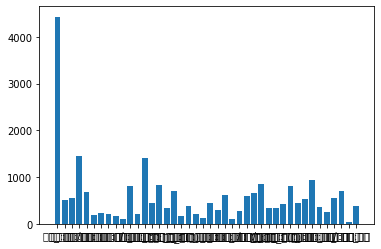

,from,sentence,entitiy1,entity1_start,entity1_end,entitiy2,entity2_start,entity2_end,class
0,aug,따라 업무를 비상체제를 5대 7월 전격 것으로 ‘쁘라삐룬’의 북상에 이 진두지휘하는...,이,38,38,양주,82,83,인물:거주_도시
0,aug,이 따라 첫 2018년 것으로 제7호 7월 ‘쁘라삐룬’의 취임식을 전격 비상체제를 ...,이,0,0,양주,82,83,인물:거주_도시
0,aug,2018년 ‘쁘라삐룬’의 지난 태풍대비 제7호 7월 시장은 시작했다. 비상체제를 따...,이,65,65,양주,91,92,인물:거주_도시
0,aug,민선7기 시장은 북상에 비상체제를 7월 이 업무를 ‘쁘라삐룬’의 지난 따라 5대 첫...,이,22,22,양주,79,80,인물:거주_도시
0,aug,이 시장은 2018년 업무를 7월 제7호 북상에 첫 것으로 따라 취소하고 시작했다....,이,0,0,양주,79,80,인물:거주_도시
0,aug,따라 ‘쁘라삐룬’의 것으로 전격 북상에 취임식을 5대 시장은 7월 비상체제를 제7호...,이,95,95,양주,85,86,인물:거주_도시
0,aug,태풍대비 태풍 진두지휘하는 시장은 7월 제7호 5대 북상에 따라 취소하고 취임식을 ...,이,91,91,양주,83,84,인물:거주_도시
0,aug,이 시장은 양주시장 첫 취임 따라 비상체제를 북상에 7월 진두지휘하는 5대 지난 태...,이,0,0,양주,6,7,인물:거주_도시
0,aug,5대 이 ‘쁘라삐룬’의 양주시장 7월 제7호 취임식을 민선7기 지난 북상에 따라 전...,이,3,3,양주,13,14,인물:거주_도시
0,aug,제7호 지난 비상체제를 시장은 태풍 ‘쁘라삐룬’의 취소하고 민선7기 이 따라 북상에...,이,38,38,양주,79,80,인물:거주_도시


In [175]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#각 라벨별 갯수 파악
label_cnt = np.zeros(len(label_type))
#train_aug = pd.read_csv('train_data.tsv', delimiter='\t', header=None)
print(len(train_data))

for _, row in train_data.iterrows() :
    for key, value in label_type.items() :
        if key == row["class"] : 
            label_cnt[value] += 1
            break

for i, cnt in enumerate(label_cnt) :
    print(i, ':', cnt, end = '\t')
    if (i+1)%3 == 0 : print()

plt.bar(np.arange(len(label_cnt)), label_cnt)
plt.xticks(np.arange(len(label_cnt)), label_type.keys())
plt.show()

train_data.tail(20)

In [176]:
print(len(train_data))
train_data.to_csv('input/data/train/train_aug_v3.tsv', sep = '\t', index = False, header = None)

24137


37647
0 : 546.0	1 : 3.0	2 : 47.0	
3 : 0.0	4 : 78.0	5 : 23.0	
6 : 17.0	7 : 14.0	8 : 38.0	
9 : 17.0	10 : 97.0	11 : 4.0	
12 : 4.0	13 : 0.0	14 : 9.0	
15 : 40.0	16 : 0.0	17 : 10.0	
18 : 0.0	19 : 0.0	20 : 15.0	
21 : 4.0	22 : 1.0	23 : 1.0	
24 : 15.0	25 : 2.0	26 : 0.0	
27 : 1.0	28 : 0.0	29 : 0.0	
30 : 0.0	31 : 0.0	32 : 0.0	
33 : 9.0	34 : 2.0	35 : 2.0	
36 : 0.0	37 : 0.0	38 : 0.0	
39 : 1.0	40 : 0.0	41 : 0.0	


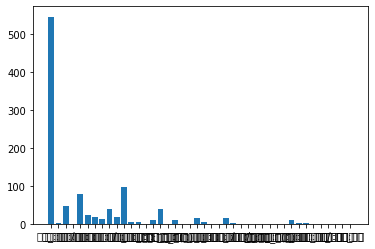

In [136]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#각 라벨별 갯수 파악
label_cnt = np.zeros(len(label_type))
output_pred = pd.read_csv('output.csv')

#train_aug = pd.read_csv('train_data.tsv', delimiter='\t', header=None)
print(len(train_data))

for _, row in output_pred.iterrows() :
    row = row["pred"]
    label_cnt[row] += 1
    
for i, cnt in enumerate(label_cnt) :
    print(i, ':', cnt, end = '\t')
    if (i+1)%3 == 0 : print()

plt.bar(np.arange(len(label_cnt)), label_cnt)
plt.xticks(np.arange(len(label_cnt)), label_type.keys())
plt.show()

'''
0 : 4432.0	1 : 92.0	2 : 553.0	
3 : 44.0	4 : 683.0	5 : 186.0	
6 : 231.0	7 : 209.0	8 : 164.0	
9 : 115.0	10 : 815.0	11 : 58.0	
12 : 45.0	13 : 11.0	14 : 45.0	
15 : 335.0	16 : 23.0	17 : 171.0	
18 : 7.0	19 : 4.0	20 : 135.0	
21 : 84.0	22 : 56.0	23 : 79.0	
24 : 103.0	25 : 52.0	26 : 8.0	
27 : 36.0	28 : 9.0	29 : 6.0	
30 : 12.0	31 : 15.0	32 : 26.0	
33 : 67.0	34 : 15.0	35 : 27.0	
36 : 11.0	37 : 3.0	38 : 18.0	
39 : 9.0	40 : 1.0	41 : 5.0	
'''

In [209]:
import pickle
import pandas as pd
import numpy as np

with open('input/data/label_type.pkl', 'rb') as f:
    label_type = pickle.load(f)
#print(label_type, type(label_type))

train_data = pd.read_csv('input/data/train/train.tsv', delimiter='\t', header=None)
train_data_aug = pd.read_csv('input/data/train/train_aug.tsv', delimiter='\t', header=None)
train_data_aug_v2 = pd.read_csv('input/data/train/train_aug_v2.tsv', delimiter='\t', header=None)
train_data_aug_v3 = pd.read_csv('input/data/train/train_aug_v3.tsv', delimiter='\t', header=None)

#columns 재지정
columns = [ 'from', 'sentence', 'entity1', 'entity1_start', 'entity1_end',
           'entity2', 'entity2_start', 'entity2_end', 'class']
train_data.columns = columns
train_data_aug.columns = columns
train_data_aug_v2.columns = columns
train_data_aug_v3.columns = columns

wrong_sentences = ['wikitree-55837-4-0-2-10-11', 'wikitree-62775-3-3-7-0-2', 'wikitree-12599-4-108-111-4-7',
                  'wikipedia-25967-115-24-26-35-37', 'wikipedia-16427-6-14-17-20-22', 'wikipedia-16427-8-0-3-26-28',
                  'wikitree-19765-5-30-33-6-8', 'wikitree-58702-0-18-20-22-24', 'wikitree-71638-8-21-23-15-17',
                  'wikipedia-257-0-0-1-53-57', 'wikipedia-23188-0-74-86-41-42', 'wikipedia-13649-28-66-70-14-24',
                  'wikipedia-6017-8-20-26-4-7']
right_class = ['단체:구성원', '단체:본사_도시', "관계_없음",
               "관계_없음", "관계_없음", "관계_없음",
               "관계_없음", "관계_없음", "관계_없음",
               "관계_없음", "단체:하위_단체", "관계_없음",
               "관계_없음"]

for i, sen in enumerate(wrong_sentences) :
    train_data.loc[train_data["from"] == sen, "class"] = right_class[i]
    loca = train_data["from"] == sen
    loca = train_data[loca]
    entity_1 = np.array(loca["entity1"])[0]
    entity_2 = np.array(loca["entity2"])[0]
    print(entity_1, entity_2)
    
    train_data_aug.loc[(train_data_aug["entity1"] == entity_1) & (train_data_aug["entity2"] == entity_2), "class"] = right_class[i]
    train_data_aug_v2.loc[(train_data_aug_v2["entity1"] == entity_1) & (train_data_aug_v2["entity2"] == entity_2), "class"] = right_class[i]
    train_data_aug_v3.loc[(train_data_aug_v3["entity1"] == entity_1) & (train_data_aug_v3["entity2"] == entity_2), "class"] = right_class[i]

train_data.to_csv('input/data/train/train_fix.tsv', sep = '\t', index = False, header = None)
train_data_aug.to_csv('input/data/train/train_aug_fix.tsv', sep = '\t', index = False, header = None)
train_data_aug_v2.to_csv('input/data/train/train_aug_v2_fix.tsv', sep = '\t', index = False, header = None)
train_data_aug_v3.to_csv('input/data/train/train_aug_v3_fix.tsv', sep = '\t', index = False, header = None)

엠블랙 미르
중앙도서관 시흥시
삼성전기 삼성전자
유시민 노무현
ASML 반도체
ASML 반도체
GS건설 허창수
유시민 노무현
유시민 노무현
삼성 안드로이드
우루과이 축구 국가대표팀 축구
EXILE rhythm zone
주간 영 점프 슈에이샤
